## Loading the data and other imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_info=pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
df=pd.read_csv('lending_club_loan_two.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


## Exploratory Data Analysis

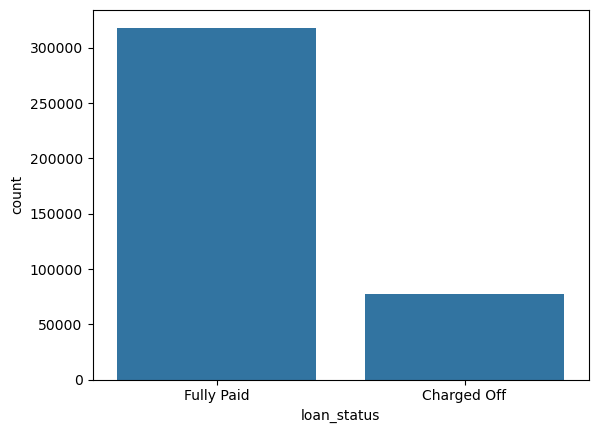

In [9]:
sns.countplot(data=df,x='loan_status')
plt.show()

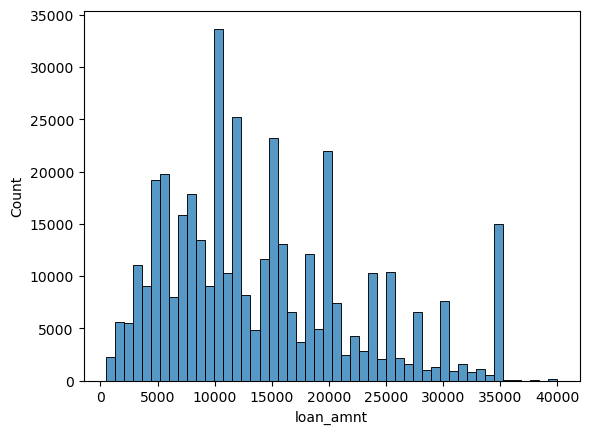

In [10]:
sns.histplot(data=df,x='loan_amnt',bins=50)
plt.show()

In [11]:
corrs=df[['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']].corr()
corrs

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


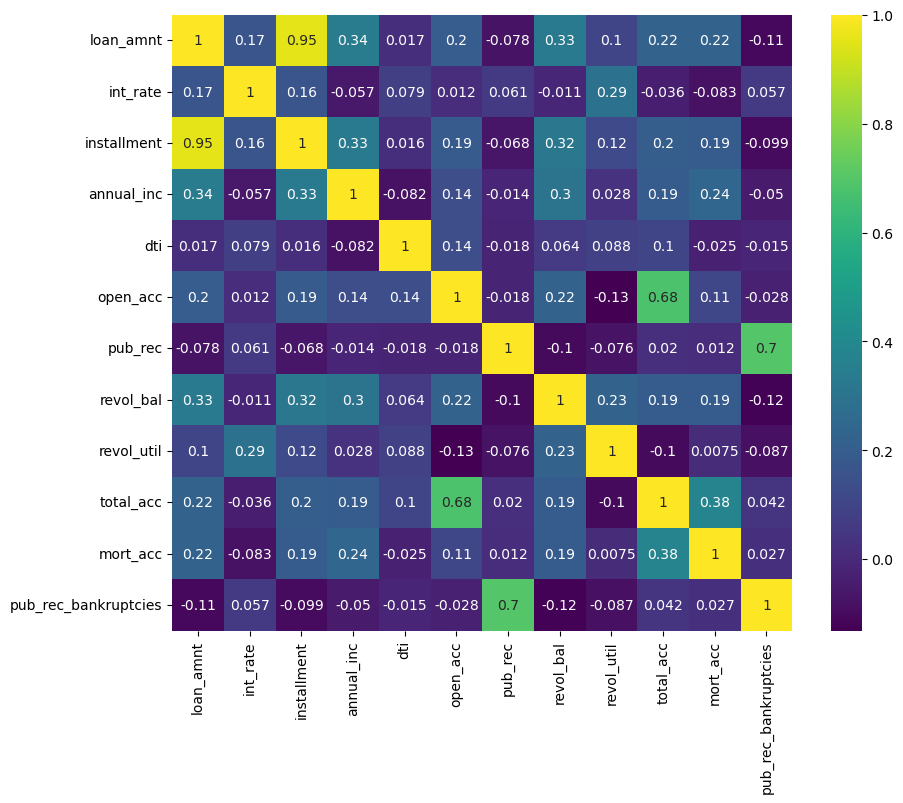

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs,annot=True,cmap='viridis')
plt.show()

In [13]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [14]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


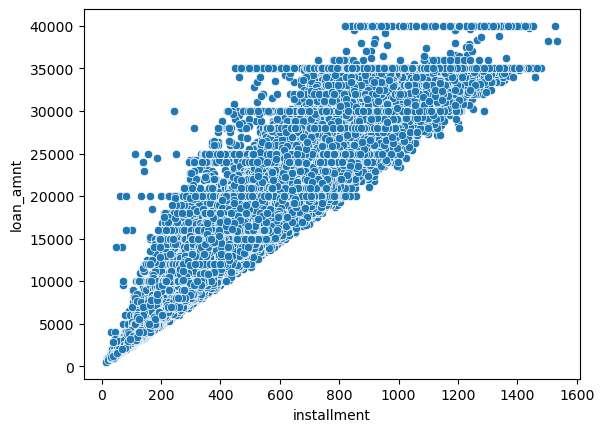

In [15]:
sns.scatterplot(df,x='installment',y='loan_amnt')
plt.show()

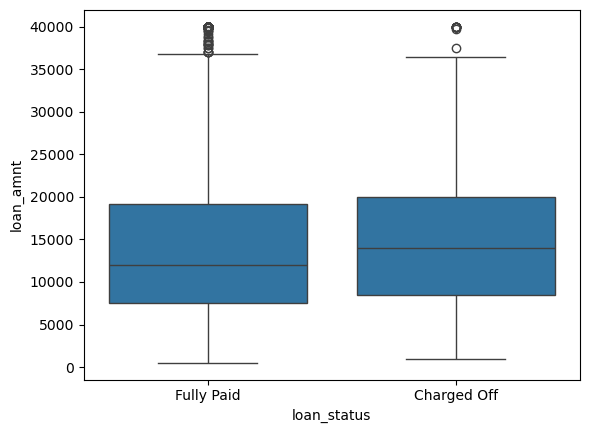

In [16]:
sns.boxplot(df,x='loan_status',y='loan_amnt')
plt.show()

In [17]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
sorted_gr=df['grade'].sort_values().unique()
sorted_gr

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [19]:
sorted_sub=sorted(df['sub_grade'].unique())
sorted_sub

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

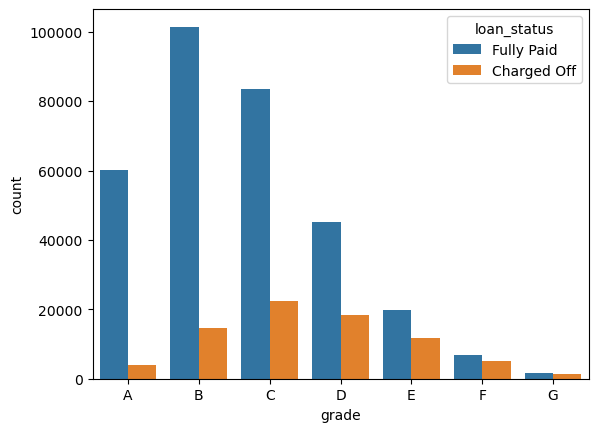

In [20]:
sns.countplot(df,x='grade',hue='loan_status',order=sorted_gr)
plt.show()

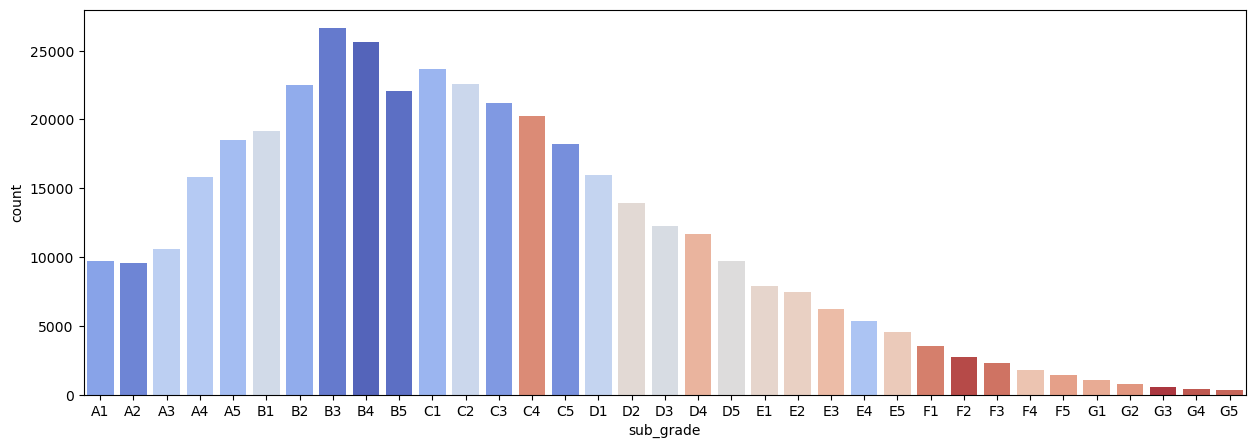

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='sub_grade',order=sorted_sub,palette='coolwarm',hue='sub_grade')
plt.show()

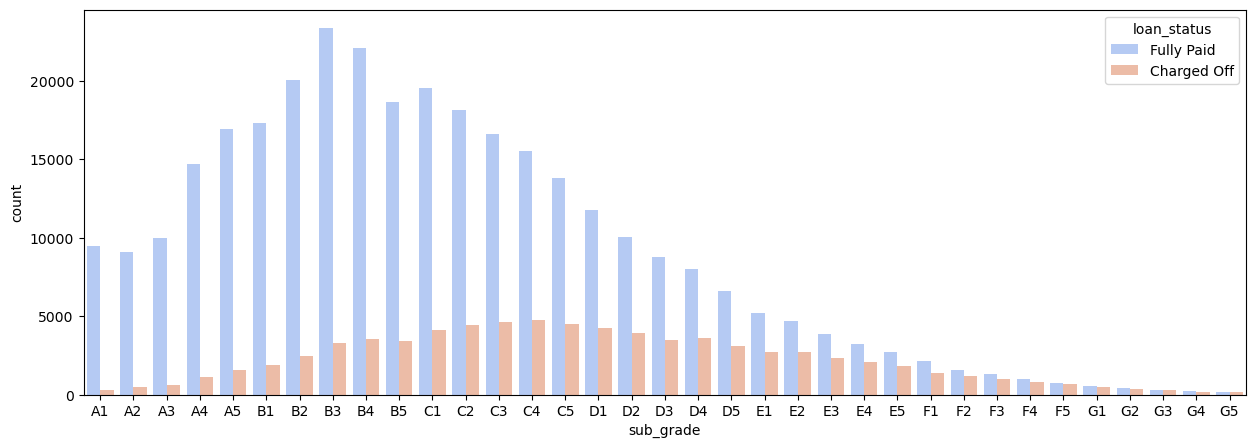

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='sub_grade',order=sorted_sub,palette='coolwarm',hue='loan_status')
plt.show()

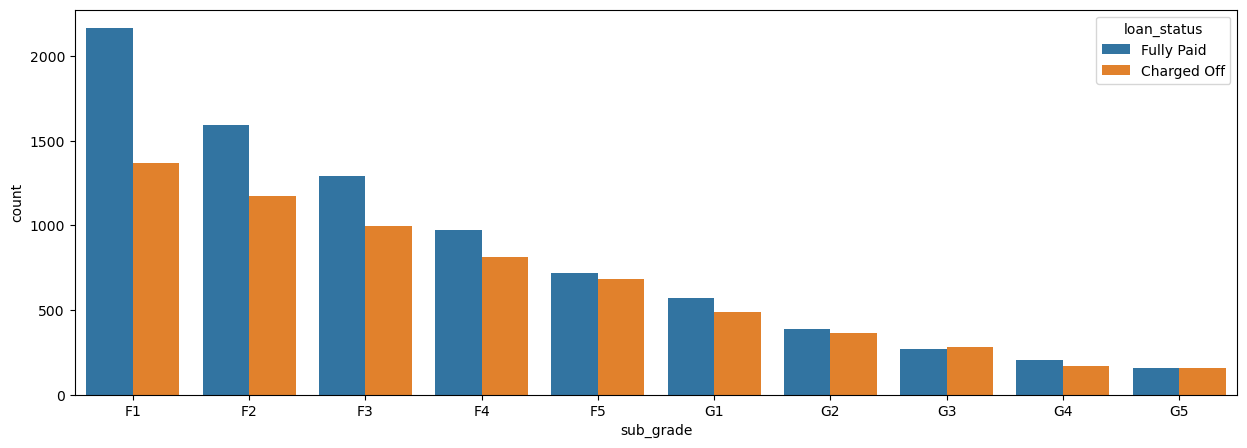

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(df,x=df['sub_grade'],hue='loan_status',order=sorted_sub[25:35])
plt.show()

In [24]:
df['loan_repaid']=df['loan_status'].map({"Fully Paid":1,"Charged Off":0})

In [25]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


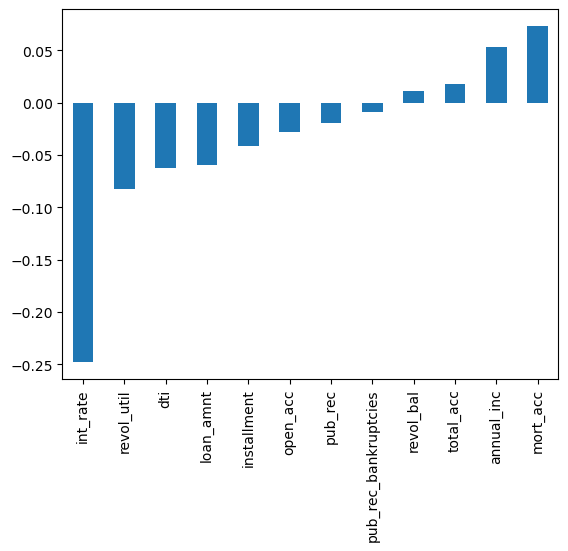

In [26]:
df[['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies','loan_repaid']].corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')
plt.show()

## Data Preprocessing

In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


### Missing Data

In [30]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [31]:
df.isnull().mean()*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [32]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [33]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [34]:
df['emp_title'].nunique()

173105

In [35]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [36]:
df=df.drop('emp_title',axis=1)

In [37]:
order_emp_len=['< 1 year','1 year',  '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '10+ years']
order_emp_len

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30224\368373426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='emp_length',order=order_emp_len,palette='magma')


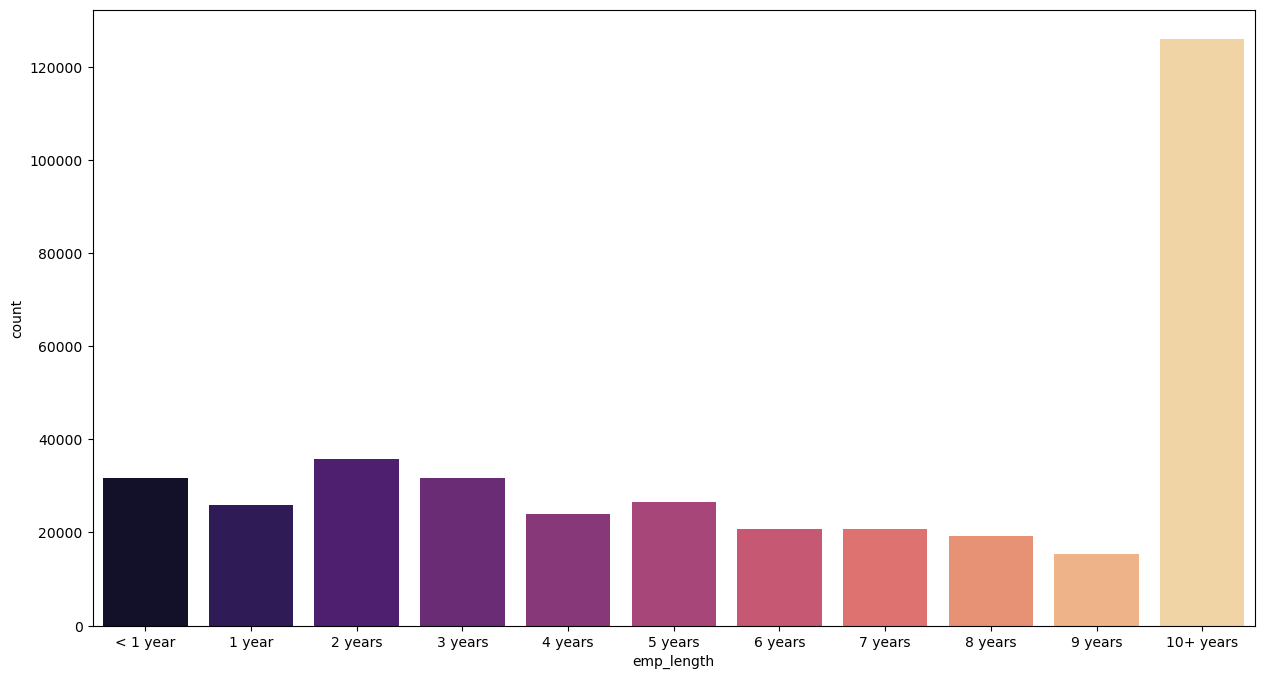

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(df,x='emp_length',order=order_emp_len,palette='magma')
plt.show()

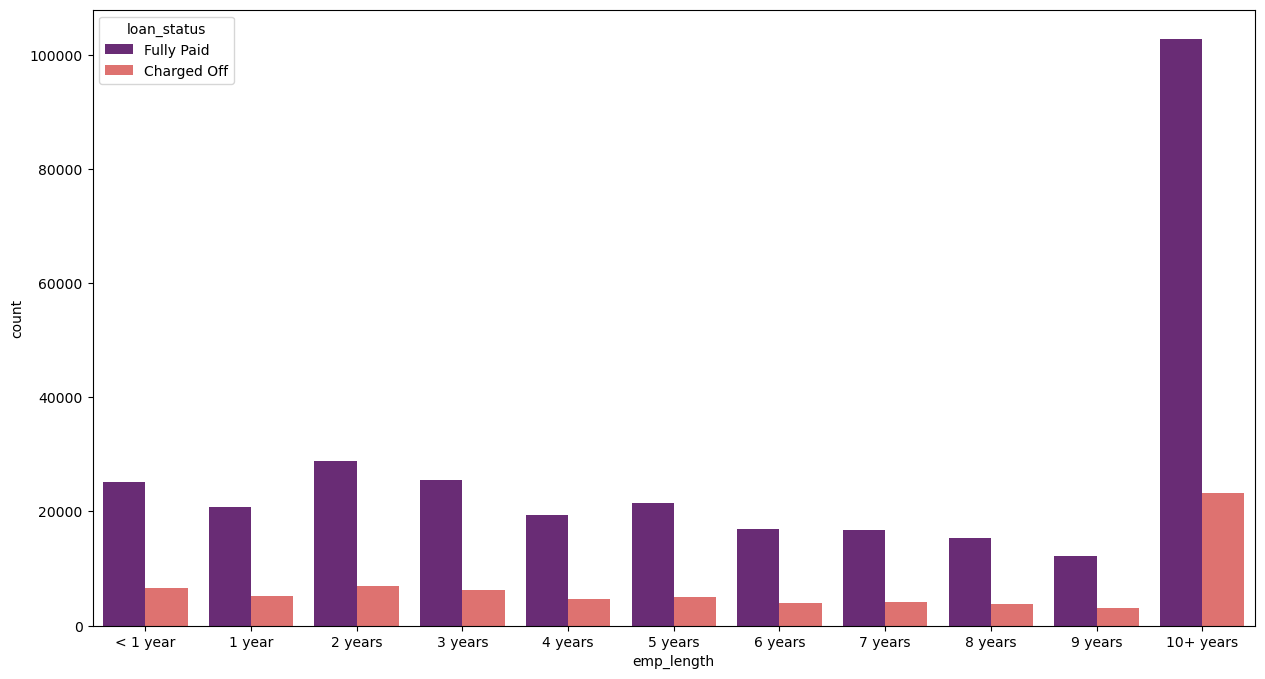

In [39]:
plt.figure(figsize=(15,8))
sns.countplot(df,x='emp_length',order=order_emp_len,palette='magma',hue='loan_status')
plt.show()

In [40]:
l_charged=df[df['loan_repaid']==0].groupby('emp_length').count()['loan_repaid']

In [41]:
l_full=df[df['loan_repaid']==1].groupby('emp_length').count()['loan_repaid']

In [42]:
l_avg=l_charged/(l_full)

In [43]:
l_avg

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_repaid, dtype: float64

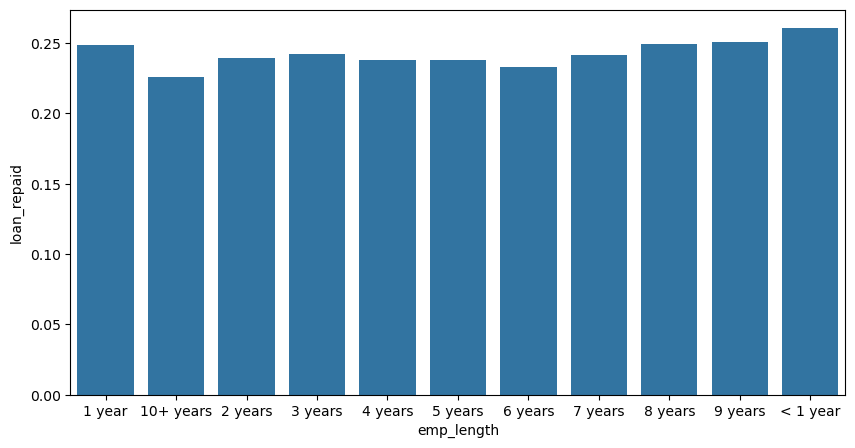

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(l_avg)
plt.show()

In [45]:
df=df.drop('emp_length',axis=1)

In [46]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [47]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [48]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [49]:
df=df.drop('title',axis=1)

In [50]:
feat_info('mort_acc')

Number of mortgage accounts.


In [51]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [52]:
corrs['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [53]:
tot_acc_avg=df.groupby('total_acc')['mort_acc'].mean()
tot_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [54]:
def my_fun(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return tot_acc_avg[total_acc]
    else:
        return mort_acc

In [55]:
df['mort_acc']=df.apply(lambda x:my_fun(x['total_acc'],x['mort_acc']),axis=1)

In [56]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [57]:
df=df.dropna()

In [58]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

In [60]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### Term

In [62]:
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [63]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

### Grade

In [65]:
df['grade'].value_counts()

grade
B    115812
C    105775
A     64056
D     63364
E     31427
F     11740
G      3045
Name: count, dtype: int64

In [66]:
df=df.drop('grade',axis=1)

### sub_grade

In [68]:
sub_dummy=pd.get_dummies(df['sub_grade'],drop_first=True,dtype=int)

In [69]:
df=pd.concat([df.drop('sub_grade',axis=1),sub_dummy],axis=1)

In [70]:
df.select_dtypes([object]).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose

In [72]:
dummies=pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True,dtype=int)
df=df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df=pd.concat([df,dummies],axis=1)

### home_ownership

In [74]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [75]:
df['home_ownership']=df['home_ownership'].replace({'NONE':'OTHER','ANY':'OTHER'})
home_dum=pd.get_dummies(df['home_ownership'],drop_first=True,dtype=int)
df=pd.concat([df.drop('home_ownership',axis=1),home_dum],axis=1)

### address

In [77]:
df['address'].iloc[0][-5:]

'22690'

In [78]:
df['zip_code']=df['address'].apply(lambda x: x[-5:])

In [79]:
zip_dum=pd.get_dummies(df['zip_code'],drop_first=True,dtype=int)
df=df.drop(['address','zip_code'],axis=1)
df=pd.concat([df,zip_dum],axis=1)

In [80]:
df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,1,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,1,0,0,0,0,0


### issue_d

In [82]:
df=df.drop('issue_d',axis=1)

### earliest_cr_line

In [84]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

## Train Test Split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
df=df.drop('loan_status',axis=1)

In [88]:
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

In [89]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

## Normalizing the Data

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler=MinMaxScaler()

In [93]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Creating the Model

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [96]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [97]:
model = Sequential()

model.add(Dense(units=78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=39,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(units=19,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [98]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.3062 - val_loss: 0.2634
Epoch 2/600
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.2636 - val_loss: 0.2629
Epoch 3/600
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.2628 - val_loss: 0.2630
Epoch 4/600
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 0.2611 - val_loss: 0.2625
Epoch 5/600
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.2602 - val_loss: 0.2622
Epoch 6/600
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.2608 - val_loss: 0.2621
Epoch 7/600
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.2618 - val_loss: 0.2629
Epoch 8/600
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.2607 - val_loss: 0.2631
Epoch 9/600
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 0.2608 - val_loss: 0.2622
Epoch 10/600
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.2589 - val_loss: 0.2627
Epoch 11/600
9881/9881 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.2583 - val_loss: 0.2629
Epoch 12

In [99]:
from tensorflow.keras.models import load_model

In [100]:
model.save('full_data_project_model.keras')  

## Section 3: Evaluating Model Performance

In [102]:
losses=pd.DataFrame(model.history.history)

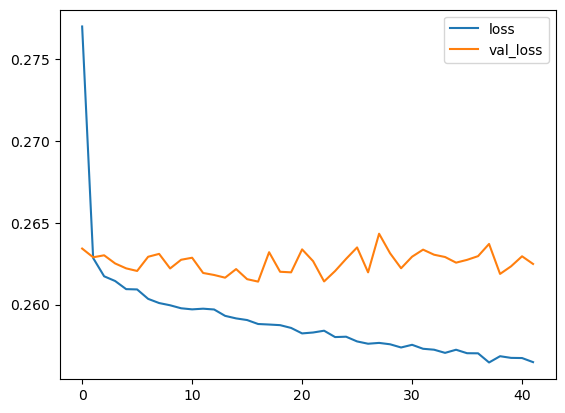

In [103]:
losses[['loss','val_loss']].plot()
plt.show()

In [104]:
from sklearn.metrics import classification_report,confusion_matrix

In [105]:
predicted_classes = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [106]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [107]:
print(confusion_matrix(y_test,predicted_classes))

[[ 6763  8895]
 [   33 63353]]


## Use the model for predict weather or not the loan is paid

In [109]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [224]:
new_customer=scaler.transform(new_customer.values.reshape(1,78))

In [238]:
y_pred=model.predict(new_customer)
predicted_class=(y_pred>0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [240]:
print(predicted_class)

[[1]]


### Checks the original data related to the customer

In [248]:
df.iloc[random_ind]['loan_repaid']

1.0